In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def combine_db_by_iso(iso, time, dbs, weights):
    v = 0
    for i in range(len(dbs)):
        try:
            v += list(dbs[i][(dbs[i]['TIME']==iso)][time])[0] * weights[i]
        except:
            v += 0
    return v

def combine_dbs_by_isoweights(dbs, weights):
    x = pd.concat(dbs)
    isos = np.insert(x['TIME'].unique(), 0, 'FLUENCE')
    times = x.columns[1:]
    y = []
    for t in times:
        temp = [t]
        for i in isos[1:]:  
            temp.append(combine_db_by_iso(i, t, dbs, weights))
        y.append(temp)
    z = pd.DataFrame(y, columns=isos)
    z['BUd'] = z['BUd'].cumsum()
    return z    

def db_slice_values(db, target_column, target_value):
    cols = db.columns
    t_array = []
    db1 = db[:1]
    db2 = db[-1:]
    x1 = db1[target_column].values[0]
    delta_x = db2[target_column].values[0] - x1
    x = target_value - x1
    for c in cols:
        if c == target_column:
            t_array.append(target_value)
        else:
            y1 = float(db1[c].values[0])
            y2 = float(db2[c].values[0])
            t_array.append(y1 + x*(y2-y1)/(delta_x))
    db.loc[-1] = t_array
    db.index =db.index + 1
    db.sort_index(inplace=True)
    return db

def iso_range(lower, upper, iso, z):
    BU_range = range(lower, upper)
    iso_array = np.zeros(len(BU_range))
    z1 = z[(z['BUd'] > lower) & (z['BUd'] < upper)]
    for i in range(len(BU_range)):
        z2 = db_slice_values(z1, 'BUd', BU_range[i])
        iso_array[i] = (z2[iso].values[0]/1000)
    return iso_array

In [3]:
U235 = pd.read_csv('U235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('U238.csv')
U238.fillna(0, inplace=True)
vals = []
e = 0.0071
lower = 20
upper = 50
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
vals.append(iso_range(lower, upper, 'PU239', z))

C:\Users\Robert\AppData\Local\Temp\ipykernel_20104\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_20104\1900076376.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_20104\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

In [4]:
vals

[array([0.00288854, 0.00288587, 0.0028832 , 0.00288053, 0.00287786,
        0.00287519, 0.00287252, 0.00286985, 0.00286719, 0.00286452,
        0.00286185, 0.00285918, 0.00285651, 0.00285384, 0.00285117,
        0.0028485 , 0.00284584, 0.00284317, 0.0028405 , 0.00283783,
        0.00283516, 0.00283249, 0.00282982, 0.00282715, 0.00282448,
        0.00282182, 0.00281915, 0.00281648, 0.00281381, 0.00281114])]

In [26]:
lower = 2
upper = 20
vals = []
for i in np.arange(3, 5, 0.1):
    e = i*0.01
    z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
    vals.append(iso_range(lower, upper, 'PU239', z))
vals = np.array(vals)

C:\Users\Robert\AppData\Local\Temp\ipykernel_32632\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_32632\1900076376.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_32632\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

In [27]:
vals

array([[0.0009524 , 0.00105648, 0.00116055, 0.00126462, 0.0013687 ,
        0.00147277, 0.00157684, 0.00168092, 0.00178499, 0.00188906,
        0.00199314, 0.00209721, 0.00220128, 0.00230536, 0.00240943,
        0.0025135 , 0.00261758, 0.00272165],
       [0.00094215, 0.00104346, 0.00114478, 0.00124609, 0.0013474 ,
        0.00144872, 0.00155003, 0.00165134, 0.00175265, 0.00185397,
        0.00195528, 0.00205659, 0.00215791, 0.00225922, 0.00236053,
        0.00246184, 0.00256316, 0.00266447],
       [0.00093238, 0.00103107, 0.00112976, 0.00122845, 0.00132714,
        0.00142583, 0.00152452, 0.00162321, 0.0017219 , 0.00182059,
        0.00191928, 0.00201797, 0.00211666, 0.00221535, 0.00231403,
        0.00241272, 0.00251141, 0.0026101 ],
       [0.00092305, 0.00101924, 0.00111544, 0.00121163, 0.00130782,
        0.00140402, 0.00150021, 0.00159641, 0.0016926 , 0.0017888 ,
        0.00188499, 0.00198118, 0.00207738, 0.00217357, 0.00226977,
        0.00236596, 0.00246216, 0.00255835],
    

In [28]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(np.arange(30,50, 1), np.arange(3, 5, 0.1), vals, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.3)

ImportError: DLL load failed while importing _backend_agg: The specified module could not be found.

C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

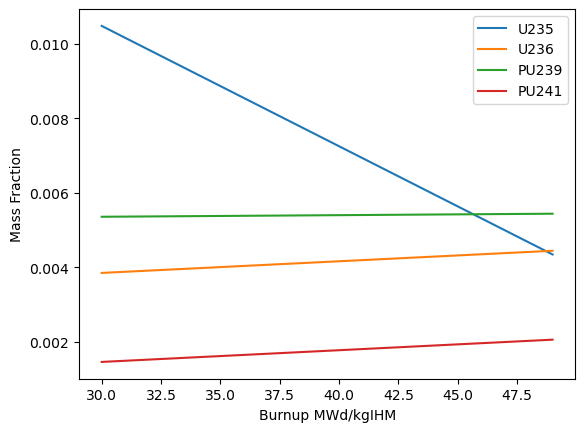

In [ ]:
U235 = pd.read_csv('LWRU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('LWRU238.csv')
U238.fillna(0, inplace=True)
e = 0.05
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
#plt.plot(BU_range, (PU239+PU241)/(PU240+PU242), label='FissilePU/NonFissilePU')
plt.plot(range(30,50), iso_range(lower, upper, 'U235', z), label='U235')
plt.plot(range(30,50), iso_range(lower, upper, 'U236', z), label='U236')
plt.plot(range(30,50), iso_range(lower, upper, 'PU239', z), label='PU239')
plt.plot(range(30,50), iso_range(lower, upper, 'PU241', z), label='PU241')
#plt.plot(BU_range, PU241*100, label='PU241')
#plt.plot(BU_range, U235*100, label='U235')
#plt.plot(BU_range, U236*100, label='U236')
plt.xlabel('Burnup MWd/kgIHM')
plt.ylabel('Mass Fraction')
plt.legend()

In [5]:
U235 = pd.read_csv('LWRU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('LWRU238.csv')
U238.fillna(0, inplace=True)
e = 0.05
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
PU239x = iso_range(lower, upper, 'PU239', z)
PU240x = iso_range(lower, upper, 'PU240', z)
PU241x = iso_range(lower, upper, 'PU241', z)
PU242x = iso_range(lower, upper, 'PU242', z)

C:\Users\Robert\AppData\Local\Temp\ipykernel_20104\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_20104\1900076376.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_20104\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

In [6]:
PU239x

array([0.00463462, 0.00465828, 0.00468194, 0.0047056 , 0.00472926,
       0.00475292, 0.00477658, 0.00480024, 0.0048239 , 0.00484757,
       0.00487123, 0.00489489, 0.00491855, 0.00494221, 0.00496587,
       0.00498953, 0.00501319, 0.00503685, 0.00506052, 0.00508418,
       0.00510784, 0.0051315 , 0.00515516, 0.00517882, 0.00520248,
       0.00522614, 0.00524981, 0.00527347, 0.00529713, 0.00532079])